### Creating a data frame

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('coaches_bp_dsa.csv')
print(df.shape)
df= df.dropna(axis=0)
print(df.shape)
df.head()


(118, 5)
(113, 5)


,School,Conf,Coach,TotalPay,Graduation Rate (GSR)
0,Air Force,Mt. West,Troy Calhoun,"$885,000",83
1,Akron,MAC,Terry Bowden,"$412,500",45
2,Alabama,SEC,Nick Saban,"$8,307,000",79
3,Appalachian State,Sun Belt,Scott Satterfield,"$712,500",57
4,Arizona,Pac-12,Kevin Sumlin,"$2,000,000",74


### Visualizations

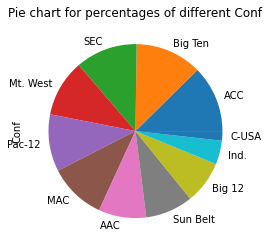

In [32]:
df['Conf'].value_counts().plot(kind='pie')
plt.title('Pie chart for percentages of different Conf')
plt.show()



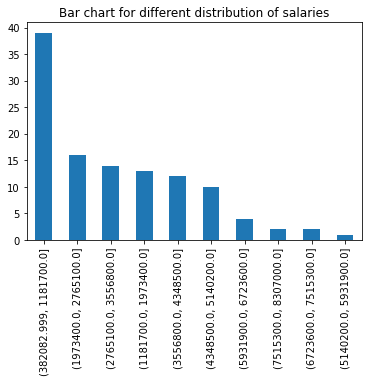

In [33]:
df[' TotalPay '] = df[' TotalPay '].str.replace(',', '')
df[' TotalPay ']=df[' TotalPay '].str.replace('$', '')
df[' TotalPay '] = df[' TotalPay '].astype(int)
df[' TotalPay '].value_counts(bins=10).plot(kind='bar')
plt.title('Bar chart for different distribution of salaries')
plt.show()

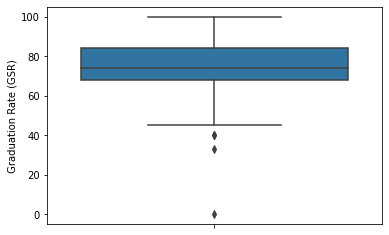

In [34]:
import seaborn as sns
sns.boxplot(y=" Graduation Rate (GSR) ", data=df)
plt.show()

In [35]:
df.columns

Index(['School', 'Conf', 'Coach', ' TotalPay ', ' Graduation Rate (GSR) '], dtype='object')

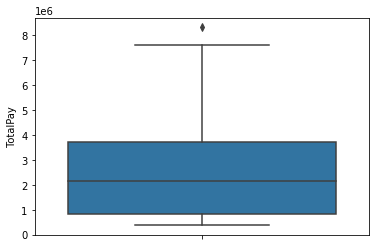

In [36]:

sns.boxplot(y=" TotalPay ", data=df)
plt.show()

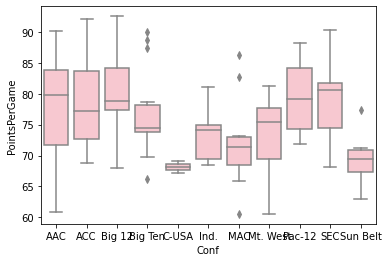

In [37]:
stats = pd.read_csv('stats_bp_dsa.csv')
sns.boxplot(x='Conf', y='PointsPerGame', data=stats, color = "pink")
plt.show()

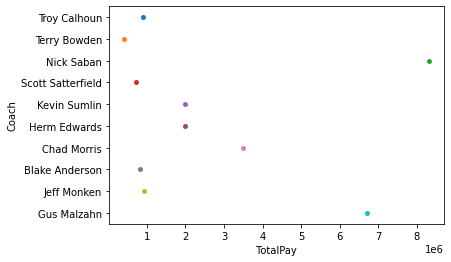

In [38]:

sns.swarmplot(x=' TotalPay ', y='Coach',data=df.iloc[0:10,:])
plt.show()

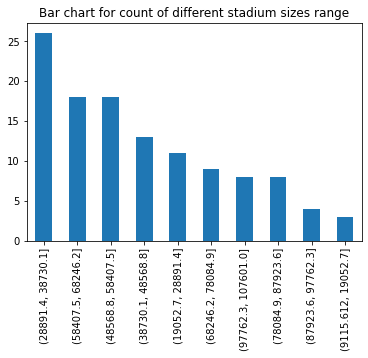

In [39]:
sta = pd.read_csv('stadium_bp_dsa.csv')
sta[' StadSize '] = sta[' StadSize '].str.replace(',', '')
sta[' StadSize ']=sta[' StadSize '].str.replace(' ', '')
sta[' StadSize '] = sta[' StadSize '].astype(int)
sta[' StadSize '].value_counts(bins=10).plot(kind='bar')
plt.title('Bar chart for count of different stadium sizes range')
plt.show()

### Regression



In [40]:
from sklearn.preprocessing import OrdinalEncoder
# encoding string values
ord_enc = OrdinalEncoder()
df['School'] = ord_enc.fit_transform(df[['School']])
df['Conf'] = ord_enc.fit_transform(df[['Conf']])
df['Coach'] = ord_enc.fit_transform(df[['Coach']])
df[' Graduation Rate (GSR) '] = pd.to_numeric(df[' Graduation Rate (GSR) '])

### Linear Regression on all columns to predict salary

In [41]:


X=df[['School', 'Conf', 'Coach', ' Graduation Rate (GSR) ']]
y = df[[' TotalPay ']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
print("Root square error for our model is: ",r2_score(y_test, y_pred))

Root square error for our model is:  0.001415979909831


### Training linear Regression model on one variable and visualize

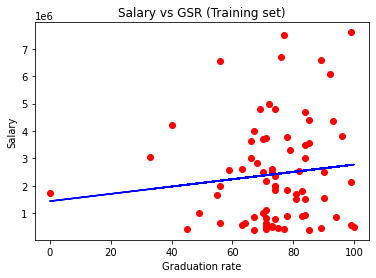

In [42]:
X=df[[' Graduation Rate (GSR) ']]
y = df[[' TotalPay ']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs GSR (Training set)')
plt.xlabel('Graduation rate')
plt.ylabel('Salary')
plt.show()

### What is recommended salary for OU football coach


In [43]:
X=df[['School',' Graduation Rate (GSR) ']]
y = df[[' TotalPay ']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# OU is encoded as 75, lets assume GSR is 75 and ignoring Conf and coach name. We trained model on 2 columns only
new_test = [[75.0,75]]
# Predicting the Test set results 
y_pred = regressor.predict(new_test)
print("Predicted salary for OU football coach is: ",y_pred[0][0])

Predicted salary for OU football coach is:  2603440.246506491


#### what will be predicted salary if OU moved to SEC

In [44]:
X=df[['School', 'Conf']]
y = df[[' TotalPay ']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#print(X_test)
# SEC is encoded to 9 and OU is encoded to 75.0
test = [[75.0,9.0]]
# Predicting the Test set results 
pred = regressor.predict(test)
print("Predicted salary if OU moved to sec will be: ",pred[0][0])


Predicted salary if OU moved to sec will be:  2293893.2242811606


### Logistic Regression

I tried to find a way to use Logistic regression for classification task too. All I come up with an idea of giving salary ranges a number and consider it as category and train the model over it. 

In [45]:
df2=df
df2[' TotalPay '] = pd.cut(df2[' TotalPay '],bins=[0,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000],labels=[1,2,3,4,5,6,7,8,9])
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)
X=df2[['School', 'Conf', 'Coach', ' Graduation Rate (GSR) ']]
y = df2[[' TotalPay ']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
model.fit(X_train, y_train)
confusion_matrix(y_test, model.predict(X_test))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[9, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 3, 1, 1, 0, 0, 0, 0, 0],
       [3, 0, 1, 1, 0, 0, 0, 0, 0],
       [3, 0, 1, 2, 0, 0, 1, 0, 0],
       [4, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0]])

### what schools we drop from our data and why

Schools with missing information are dropped to clean data.

In [46]:
dff = pd.read_csv('coaches_bp_dsa.csv')
print("Shape of dataset before dropping rows: ",dff.shape)
dropped = (dff.index[dff.isnull().any(axis=1)]).to_list()
schools=[]
for i in dropped:
  schools.append(dff.iloc[i,0])
print("Schools Dropped are: ", schools)
dff= dff.dropna(axis=0)
print("Shape of dataset after dropping rows with nan values",dff.shape)


Shape of dataset before dropping rows:  (118, 5)
Schools Dropped are:  ['Baylor', 'Brigham Young', 'Southern Methodist', 'Temple', 'Tennessee']
Shape of dataset after dropping rows with nan values (113, 5)


### What is the single biggest impact on salary
We can find it using co-relation that what factor has major effect on salary. But as per my analysis, the factor of which team moved from where to where has major role on salary. 

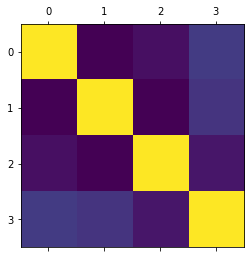

In [48]:
plt.matshow(df.corr())
plt.title("Corelation matrix")
plt.show()